# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
result_path = "/home/joel/resultsAsoc2021/results_to_plot/"

# Functions

In [48]:
# def prepare_minasbr_df(path):
#     data_minasbr = pd.read_csv(path)
#     data_unk = data_minasbr.copy()
#     data_minasbr["Classifier"] = "MINAS-BR_v2"
#     data_unk["Classifier"] = "UnkRM_v2"
#     for i in data_unk.drop(["Timestamp", "Classifier"],axis=1).columns:
#         data_unk[i] = data_unk['unkRM']
#     data_minasbr = pd.concat([data_minasbr,data_unk])
#     return data_minasbr

In [3]:
def concat_datasets_for_ploting(batch_patch, upper_patch, bracis_patch, minasbr_patch):
    df_batch = pd.read_csv(batch_patch)
    df_upper = pd.read_csv(upper_patch)

    df_bracis = pd.read_csv(bracis_patch)
    df_bracis_classifier = df_bracis.query("Classifier == 'MINAS-BR'")
    df_bracis_unkrm = df_bracis.query("Classifier == 'UnkRM'")
    df_bracis_classifier["Classifier"] = "MINAS-BR_v1"
    df_bracis_unkrm["Classifier"] = "UnkRM_v1"
    df_bracis = pd.concat([df_bracis_classifier.iloc[:-1],df_bracis_unkrm.iloc[:-1]])

    df_minasbr = pd.read_csv(minasbr_patch)
    df_minasbr_classifier = df_minasbr.query("Classifier == 'MINAS-BR'")
    df_minasbr_unkrm = df_minasbr.query("Classifier == 'UnkRM'")
    df_minasbr_classifier["Classifier"] = "MINAS-BR_v2"
    df_minasbr_unkrm["Classifier"] = "UnkRM_v2"
    df_minasbr = pd.concat([df_minasbr_classifier.iloc[:-1],df_minasbr_unkrm.iloc[:-1]])

    df_final = pd.concat([df_minasbr, df_bracis, df_upper, df_batch])
    return df_final

In [4]:
def get_concept_evolution_np_info(minasbr_path):
    concept_evolution_info = pd.read_csv(os.path.join(minasbr_path,"conceptEvolution-info.csv"))

    np_windows = pd.read_csv(os.path.join(minasbr_path,"NP-info.csv"))
    print(np_windows)
    if len(np_windows) > 0:
        np_windows = np_windows.dropna().reset_index().drop(['index'],axis=1)
        np_windows.columns = ["timestamp","NP","associated_class","timestamp_association","window_association"]
        x = np_windows['window_association'].duplicated().map(lambda i: not i)
        np_windows_duplicated_less = np_windows[x]
        np_windows_duplicated_less.reset_index(inplace=True)
        np_windows_duplicated_less = np_windows_duplicated_less.drop(['index'],axis=1)
        np_info = np_windows_duplicated_less.sort_values(by='window_association')
        return np_info, concept_evolution_info
    else:
        return None, concept_evolution_info

In [5]:
def plot_measures_over_time(data, 
                            np_info,
                            np_info_v1,
                            concept_evolution_info,
                            linewidth,
                            markersize,
                            savefig=False,
                            name_fig=None):

    fig, axs = plt.subplots(2, gridspec_kw={
                            'width_ratios': [1],
                            'height_ratios': [1, 7],
                                'hspace': 0.05})
    sns.lineplot(data=data,
                y="F1M",
                x="Timestamp",
                hue="Classifier",
                style="Classifier",
                markers=True,
                dashes=True,
                linewidth=linewidth,
                markersize=markersize,
                ax=axs[1])
    axs[1].legend(fontsize='large')
    axs[1].set_ylim(0, 1)
    axs[1].set_xlim(0, 51)
    axs[0].set_xlim(0, 51)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    fig.set_size_inches(12, 6)

    for i in concept_evolution_info.index:
    #     axs[0].annotate(concept_evolution_window['label'].iloc[i],
    #                 xy=(concept_evolution_window['window'].iloc[i]-1, 0),
    #                 xycoords='data',
    #                 bbox=dict(boxstyle="round", fc="red", ec="red"),
    #                 xytext=(15, 10),
    #                 textcoords='offset points',
    #                 ha='center',
    #                 arrowprops=dict(arrowstyle="->"),
    #                 fontsize = 16)
        axs[0].vlines(x = concept_evolution_info['window'],
                ymin=0,
                ymax=1,
                colors='black',
                linestyles='solid')
    # pos = [60,40,20,40,20,20,20,40,20]
    if np_info is not None:
        for i in np_info.index:
            # label = str(np_windows_duplicated_less['associated_class'].iloc[i])
        #     ax.annotate(label, xy=(np_windows.iloc[i,-1]-1, 1),  xycoords='data',
        #                 xytext=(0, pos[i]), textcoords='offset points', ha='center',
        #                 arrowprops=dict(arrowstyle="->"),
        #                 bbox=dict(boxstyle="round", fc="cyan", ec="white"),
        #                 fontsize=12)

            axs[1].vlines(x=np_info.iloc[i,-1],
                    ymin=0,
                    ymax=1,
                    colors='black',
                    linestyles='solid',
                    label="NP1")

    if np_info_v1 is not None:
        for i in np_info_v1.index:
            axs[1].vlines(x=np_info_v1.iloc[i,-1],
                    ymin=0,
                    ymax=1,
                    colors='red',
                    linestyles='dashed',
                    label="NP1")
        

    axs[1].set_xlabel("Windows", fontsize=18)
    axs[1].set_ylabel("F1M and UnkRM", fontsize=18)
    axs[1].tick_params(labelsize=12)
    if savefig:
        plt.savefig(name_fig, dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

In [6]:
def plot_measures_over_time_sinais(data, 
                            np_info,
                            np_info_v1,
                            concept_evolution_info,
                            linewidth,
                            markersize,
                            savefig=False,
                            name_fig=None):

    fig, axs = plt.subplots(3, gridspec_kw={
                            'width_ratios': [1],
                            'height_ratios': [0.75, 0.75, 7],
                                'hspace': 0.15})
    sns.lineplot(data=data,
                y="F1M",
                x="Timestamp",
                hue="Classifier",
                style="Classifier",
                markers=True,
                dashes=True,
                linewidth=linewidth,
                markersize=markersize,
                ax=axs[2])
    # fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axs[2].legend(fontsize='large',
                    bbox_to_anchor=(0., -0.1, 1., -0.1),
                    loc=0,
                    ncol=8, 
                    mode="expand",
                    borderaxespad=0.)
    axs[2].set_ylim(0, 1)
    axs[2].set_xlim(0, 51)
    axs[0].set_xlim(0, 51)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].set_xlim(0, 51)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    fig.set_size_inches(12, 6)
    x = 0
    for i in concept_evolution_info.index:
        
        axs[0].annotate(concept_evolution_info['label'].iloc[i],
                    xy=(concept_evolution_info['window'].iloc[i]+1, 0),
                    xycoords='data',
                    bbox=dict(boxstyle="round", fc="red", ec="red"),
                    xytext=(30, 10),
                    textcoords='offset points',
                    ha='center',
                    arrowprops=dict(arrowstyle="->"),
                    fontsize = 12)

        axs[0].vlines(x = concept_evolution_info['window']+1,
                ymin=0,
                ymax=1,
                colors='black',
                linestyles='solid')
    # pos = [60,40,20,40,20,20,20,40,20]
    if np_info is not None:
        for i in np_info.index:
            # label = str(np_windows_duplicated_less['associated_class'].iloc[i])
            axs[1].annotate(int(np_info['associated_class'].iloc[i]),
                        xy=(np_info.iloc[i,-1], 1),
                        xycoords='data',
                        xytext=(30, 10),
                        textcoords='offset points',
                         ha='center',
                        arrowprops=dict(arrowstyle="->"),
                        bbox=dict(boxstyle="round", fc="blue", ec="white"),
                        fontsize=12)
            

            axs[1].vlines(x=np_info.iloc[i,-1],
                    ymin=0,
                    ymax=1,
                    colors='black',
                    linestyles='solid',
                    label="NP1")

    if np_info_v1 is not None:
        for i in np_info_v1.index:
            axs[1].vlines(x=np_info_v1.iloc[i,-1],
                    ymin=0,
                    ymax=1,
                    colors='red',
                    linestyles='dashed',
                    label="NP1")
            
            axs[1].annotate(int(np_info_v1['associated_class'].iloc[i]),
                        xy=(np_info_v1.iloc[i,-1], 0),
                        xycoords='data',
                        xytext=(-15, -10),
                        textcoords='offset points',
                        ha='center',
                        arrowprops=dict(arrowstyle="->"),
                        bbox=dict(boxstyle="round", fc="green", ec="white"),
                        fontsize=12)

                
        

    axs[2].set_xlabel("Windows", fontsize=18)
    axs[2].set_ylabel("F1M and UnkRM", fontsize=18)
    axs[2].tick_params(labelsize=12)
    
    if savefig:
        plt.savefig(name_fig, dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

## MOA1

In [69]:
moa1_batch_homer = os.path.join(result_path, "MOA1/HOMER/HOMER-MeasuresOverTime.csv")
moa1_upper_eabr = os.path.join(result_path, "MOA1/EaBR/EaBR-MeasuresOverTime.csv")
moa1_bracis = os.path.join(result_path, "MOA1/bracis_moa1_final/MeasuresOverTime.csv")
moa1_minasbr = os.path.join(result_path,"MOA1/minas-br_MOA1/MeasuresOverTime.csv")

In [70]:
df_moa1_final = concat_datasets_for_ploting(moa1_batch_homer,
                                            moa1_upper_eabr,
                                            moa1_bracis,
                                            moa1_minasbr)

df_moa1_final.Classifier.value_counts()

EaBR           50
MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
HOMER          50
MINAS-BR_v1    50
Name: Classifier, dtype: int64

In [71]:
np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"MOA1/minas-br_MOA1/"))
print(concept_evolution_info)
np_info

   Timestamp  window  label
0      30011      16      5
1      70005      38      6


,timestamp,NP,associated_class,timestamp_association,window_association
0,41877,NP1,5.0,43200.0,23.0
1,41877,NP10,5.0,54000.0,29.0
2,41877,NP30,5.0,77400.0,42.0


In [72]:
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"MOA1/bracis_moa1_final/"))
print(concept_evolution_info)
np_info_v1

   Timestamp  window  label
0      30011      16      5
1      70005      38      6


,timestamp,NP,associated_class,timestamp_association,window_association
0,51982,NP1,5.0,52200.0,28.0
1,51982,NP5,5.0,57600.0,31.0
2,51982,NP12,5.0,66600.0,36.0
3,51982,NP16,6.0,70200.0,38.0
5,51982,NP31,6.0,73800.0,40.0
4,51982,NP26,5.0,75600.0,41.0


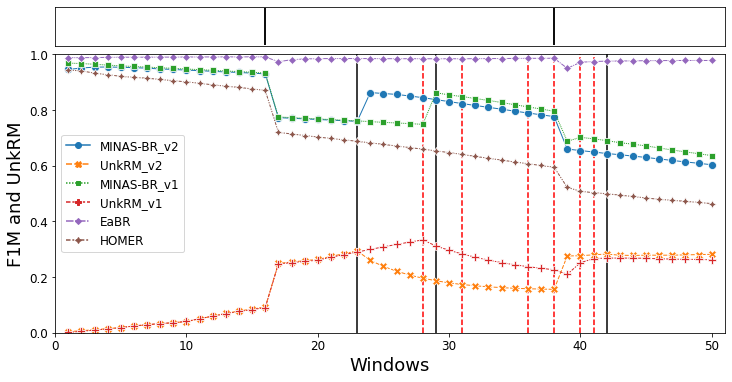

In [73]:
plot_measures_over_time(data=df_moa1_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 1,
                        markersize= 8)
                        # savefig=True,
                        # name_fig="moa1_plot_com_.pdf")

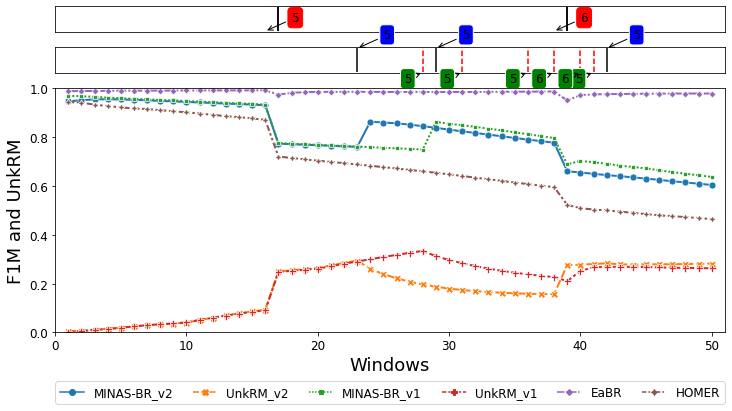

In [74]:
plot_measures_over_time_sinais(data=df_moa1_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="moa1_F1M.pdf")

# MOA2

In [59]:
moa2_batch = os.path.join(result_path, "MOA2/PSt/PSt-MeasuresOverTime.csv")
moa2_upper = os.path.join(result_path, "MOA2/EaBR/EaBR-MeasuresOverTime.csv")
moa2_bracis = os.path.join(result_path, "MOA2/bracis_moa2_final/MeasuresOverTime.csv")
moa2_minasbr = os.path.join(result_path,"MOA2/minas-br_MOA2/MeasuresOverTime.csv")

In [60]:
df_moa2_final = concat_datasets_for_ploting(moa2_batch,
                                            moa2_upper,
                                            moa2_bracis,
                                            moa2_minasbr)

df_moa2_final.Classifier.value_counts()

EaBR           50
MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
MINAS-BR_v1    50
PSt            50
Name: Classifier, dtype: int64

In [61]:
np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"MOA2/minas-br_MOA2/"))
print(concept_evolution_info)
np_info

   Timestamp  window  label
0      10408       3      0
1      47403      17      1


,timestamp,NP,associated_class,timestamp_association,window_association
1,9168,NP12,0.0,10472.0,3.0
0,4973,NP5,0.0,13090.0,4.0
2,15792,NP32,0.0,18326.0,6.0
3,21596,NP44,0.0,23562.0,8.0
4,21596,NP52,0.0,26180.0,9.0
5,30386,NP57,0.0,31416.0,11.0
6,43187,NP67,0.0,44506.0,16.0
7,56599,NP78,0.0,57596.0,21.0
8,56599,NP82,1.0,68068.0,25.0
9,66194,NP95,1.0,70686.0,26.0


In [62]:
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"MOA2/bracis_moa2_final/"))
print(concept_evolution_info)
np_info_v1

   Timestamp  window  label
0      10408       3      0
1      47403      17      1


,timestamp,NP,associated_class,timestamp_association,window_association
1,13093,NP12,0.0,15708.0,5.0
0,13093,NP8,0.0,28798.0,10.0
3,61914,NP24,1.0,62832.0,23.0
8,61914,NP43,1.0,68068.0,25.0
7,61914,NP30,1.0,70686.0,26.0
4,61914,NP25,1.0,73304.0,27.0
5,61914,NP28,1.0,78540.0,29.0
2,61914,NP23,1.0,81158.0,30.0
6,61914,NP29,1.0,83776.0,31.0


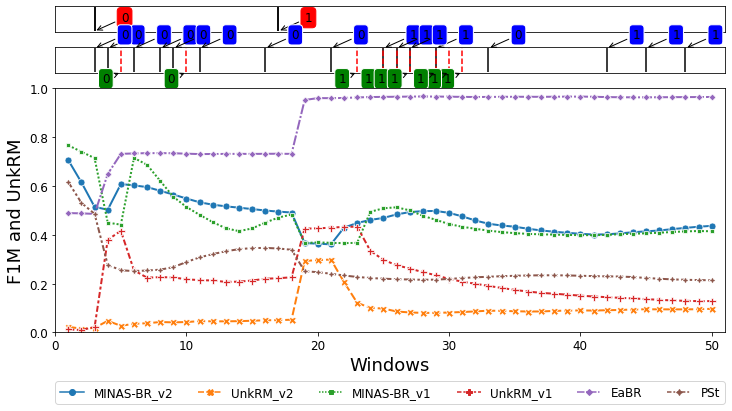

In [63]:
plot_measures_over_time_sinais(data=df_moa2_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="moa2_F1M.pdf")

# Yeast Original

In [64]:
yeast_original_batch = os.path.join(result_path, "yeast_original/RandomSubspaceML/RandomSubspaceML-Results.csv")
yeast_original_upper = os.path.join(result_path, "yeast_original/EaCC/EaCC-Results.csv")
yeast_original_bracis = os.path.join(result_path, "yeast_original/bracis_yeast_original/MeasuresOverTime.csv")
yeast_original_minasbr = os.path.join(result_path,"yeast_original/minas-br_yeast_original/MeasuresOverTime.csv")

df_yeast_final = concat_datasets_for_ploting(yeast_original_batch,
                                            yeast_original_upper,
                                            yeast_original_bracis,
                                            yeast_original_minasbr)

df_yeast_final.Classifier.value_counts()

MINAS-BR_v2    51
UnkRM_v1       51
UnkRM_v2       51
MINAS-BR_v1    51
Name: Classifier, dtype: int64

In [65]:
np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"yeast_original/minas-br_yeast_original/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"yeast_original/bracis_yeast_original/"))

print(concept_evolution_info)
print(np_info)
np_info_v1

   Timestamp  window  label
0        156       3     13
None


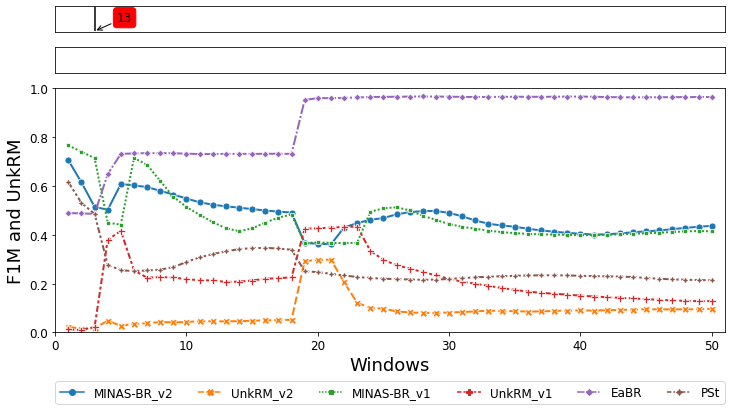

In [66]:
plot_measures_over_time_sinais(data=df_moa2_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="yeast_original.pdf")

# Yeast modified

EaBR           50
MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
MINAS-BR_v1    50
CLR            50
Name: Classifier, dtype: int64
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
   Timestamp  window  label
0          1       0      4
1          1       0      5
2        816      18      3
None
None


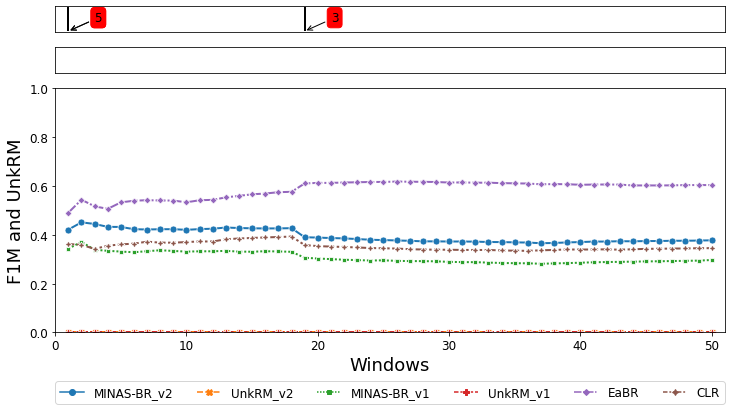

In [133]:
df_batch = os.path.join(result_path, "yeast_modified/CLR/CLR-MeasuresOverTime.csv")
df_upper = os.path.join(result_path, "yeast_modified/EaBR/EaBR-MeasuresOverTime.csv")
df_bracis = os.path.join(result_path, "yeast_modified/bracis_yeast_modified/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"yeast_modified/minas-br_yeast_modified/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"yeast_modified/minas-br_yeast_modified/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"yeast_modified/bracis_yeast_modified/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="yeast_modified.pdf")

# Scene Original

BPMLL          50
MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
MINAS-BR_v1    50
EaISOUPTree    50
Name: Classifier, dtype: int64
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
   Timestamp   NP   AssociatedClass   TimestampAssociation  \
0        109  NP1                 2                    215   
1        109  NP2                 2                    172   

    windowAssociation   
0                    5  
1                    4  
   Timestamp  window  label
0        152       3      2
1        153       3      3
None
   timestamp   NP  associated_class  timestamp_association  window_association
1        109  NP2                 2                    172                   4
0        109  NP1                 2                    215                   5


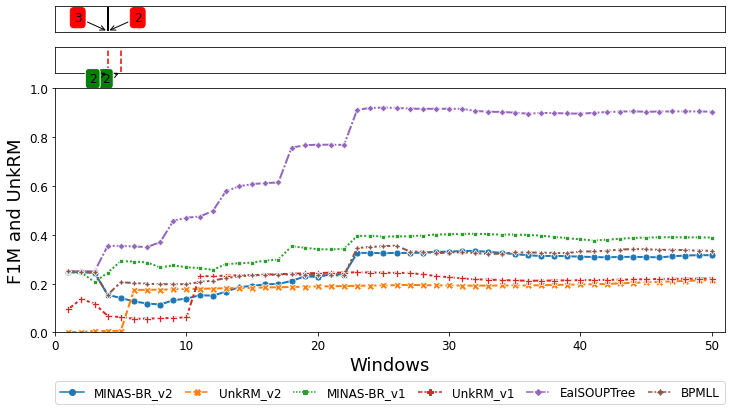

In [145]:
df_batch = os.path.join(result_path, "scene_original/BPMLL/BPMLL-Results.csv")
df_upper = os.path.join(result_path, "scene_original/EaISOUPTree/EaISOUPTree-Results.csv")
df_bracis = os.path.join(result_path, "scene_original/bracis_scene_original/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"scene_original/minas-br_scene_original/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"scene_original/minas-br_scene_original/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"scene_original/bracis_scene_original/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="scene_original.pdf")

# Scene Modified


BPMLL          50
MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
MINAS-BR_v1    50
EaISOUPTree    50
Name: Classifier, dtype: int64
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
   Timestamp   NP   AssociatedClass   TimestampAssociation  \
0        220  NP1                 5                    602   
1        220  NP2                 5                    645   

    windowAssociation   
0                   14  
1                   15  
   Timestamp  window  label
0          1       0      5
1        991      23      2
None
   timestamp   NP  associated_class  timestamp_association  window_association
0        220  NP1                 5                    602                  14
1        220  NP2                 5                    645                  15


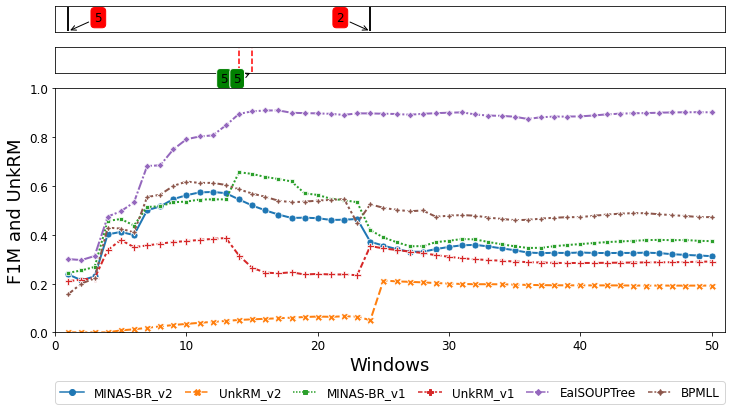

In [144]:
df_batch = os.path.join(result_path, "scene_modified/BPMLL/BPMLL-Results.csv")
df_upper = os.path.join(result_path, "scene_modified/EaISOUPTree/EaISOUPTree-MeasuresOverTime.csv")
df_bracis = os.path.join(result_path, "scene_modified/bracis_scene_modified/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"scene_modified/minas-br_scene_modified/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"scene_modified/minas-br_scene_modified/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"scene_modified/bracis_scene_modified/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="scene_modified.pdf")

# Mediamill Modified

MINAS-BR_v2    50
UnkRM_v1       50
UnkRM_v2       50
MINAS-BR_v1    50
CLR            50
EaISOUPTree    50
Name: Classifier, dtype: int64
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
Empty DataFrame
Columns: [Timestamp,  NP,  AssociatedClass,  TimestampAssociation,  windowAssociation ]
Index: []
   Timestamp  window  label
0          1       0      6
1       6355       8      3
2      14415      19      4
None
None


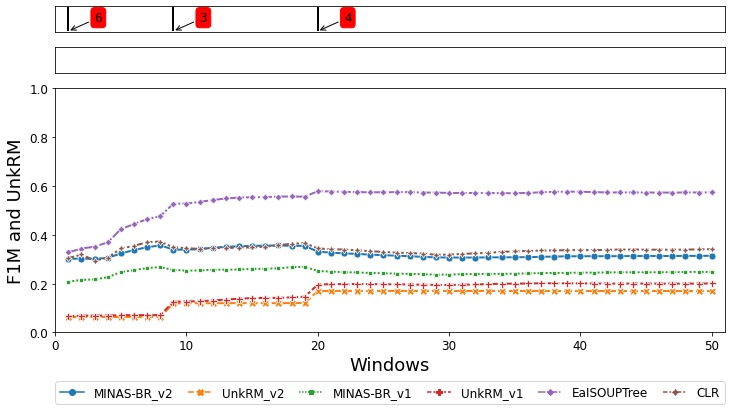

In [150]:
df_batch = os.path.join(result_path, "mediamill_modified/CLR/CLR-MeasuresOverTime.csv")
df_upper = os.path.join(result_path, "mediamill_modified/EaISOUPTree/EaISOUPTree-MeasuresOverTime.csv")
df_bracis = os.path.join(result_path, "mediamill_modified/bracis_mediamill_modified/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"mediamill_modified/minas-br_mediamill_modified/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"mediamill_modified/minas-br_mediamill_modified/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"mediamill_modified/bracis_mediamill_modified/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="mediamill_modified.pdf")

# Mediamill Original

<ipython-input-3-82e461aff0f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bracis_classifier["Classifier"] = "MINAS-BR_v1"
<ipython-input-3-82e461aff0f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bracis_unkrm["Classifier"] = "UnkRM_v1"
<ipython-input-3-82e461aff0f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

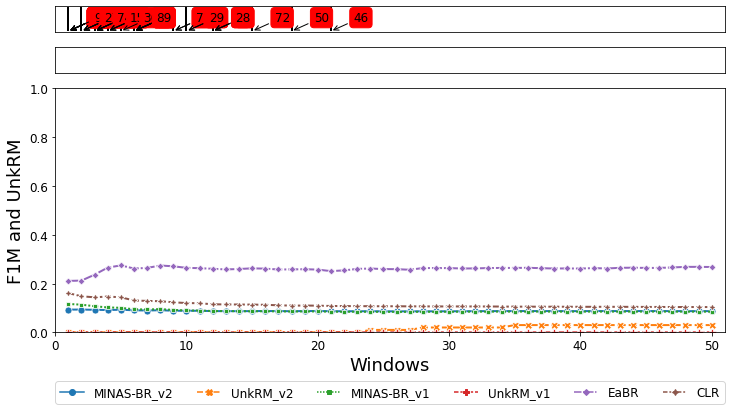

In [7]:
df_batch = os.path.join(result_path, "mediamill_original/CLR/CLR-Results.csv")
df_upper = os.path.join(result_path, "mediamill_original/EaBR/EaBR-Results.csv")
df_bracis = os.path.join(result_path, "mediamill_original/bracis_mediamill_original/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"mediamill_original/minas-br_mediamill_original/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"mediamill_original/minas-br_mediamill_original/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"mediamill_original/bracis_mediamill_original/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="mediamill_original.pdf")

# Nus-wide Modified

<ipython-input-3-82e461aff0f0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bracis_classifier["Classifier"] = "MINAS-BR_v1"
<ipython-input-3-82e461aff0f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bracis_unkrm["Classifier"] = "UnkRM_v1"
<ipython-input-3-82e461aff0f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

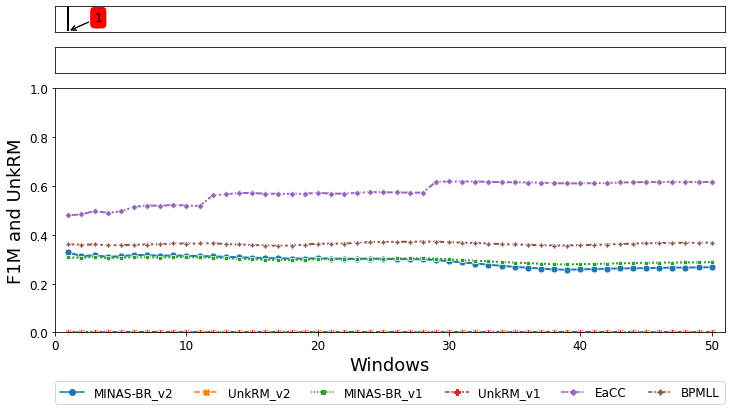

In [12]:
df_batch = os.path.join(result_path, "nus-wide_modified/BPMLL/BPMLL-MeasuresOverTime.csv")
df_upper = os.path.join(result_path, "nus-wide_modified/EaCC/EaCC-Results.csv")
df_bracis = os.path.join(result_path, "nus-wide_modified/bracis_nus-wide_modified/MeasuresOverTime.csv")
df_minasbr = os.path.join(result_path,"nus-wide_modified/minas-br_nus-wide_modified/MeasuresOverTime.csv")

df_final = concat_datasets_for_ploting(df_batch,
                                            df_upper,
                                            df_bracis,
                                            df_minasbr)

print(df_final.Classifier.value_counts())

np_info, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"nus-wide_modified/minas-br_nus-wide_modified/"))
np_info_v1, concept_evolution_info  = get_concept_evolution_np_info(os.path.join(result_path,"nus-wide_modified/bracis_nus-wide_modified/"))

print(concept_evolution_info)
print(np_info)
print(np_info_v1)

plot_measures_over_time_sinais(data=df_final,
                        np_info=np_info,
                        np_info_v1=np_info_v1,
                        concept_evolution_info=concept_evolution_info,
                        linewidth = 2,
                        markersize= 7,
                        savefig=True,
                        name_fig="nus-wide_modified.pdf")